In [1]:
import ast
import pandas as pd
from typing import Union
from fastapi import FastAPI
from datetime import datetime
import json
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import joblib

from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv("dataset_Transformado.csv", sep=";")

# Paso 3: Convertir las columnas con listas de cadenas en listas de Python
df['production_countries'] = df['production_countries'].apply(
    ast.literal_eval)
df['company_names'] = df['company_names'].apply(ast.literal_eval)
df['company_ids'] = df['company_ids'].apply(ast.literal_eval)
df['genre_names'] = df['genre_names'].apply(ast.literal_eval)

# Paso 4: Seleccionar las características relevantes para el modelo de recomendación y realizar la imputación de valores faltantes
features = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average']
X = df[features]

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Paso 5: Construir el modelo de k-NN
model = NearestNeighbors(metric='manhattan', n_neighbors=2)
model.fit(X_scaled)


def recomendacion(titulo: str):
    '''Ingresas un nombre de pelicula y te recomienda las similares en una lista'''
    # Buscar el índice de la película según el título
    movie_index = df[df['title'] == titulo].index[0]

    # Convertir el vector de características en un arreglo bidimensional
    X_movie = X_scaled[movie_index].reshape(1, -1)

    # Obtener las películas recomendadas utilizando el modelo de k-NN
    distances, indices = model.kneighbors(X_movie)
    recommended_movies = df.iloc[indices[0]]['title'].tolist()

    respuesta = {'1': str(recommended_movies[0]), '2': str(recommended_movies[1]), '3': str(
        recommended_movies[2]), '4': str(recommended_movies[3]), '5': str(recommended_movies[4])}

    return {'lista recomendada': respuesta}


In [5]:

from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler


# Paso 3: Convertir las columnas con listas de cadenas en listas de Python
df['production_countries'] = df['production_countries'].apply(
    ast.literal_eval)
df['company_names'] = df['company_names'].apply(ast.literal_eval)
df['company_ids'] = df['company_ids'].apply(ast.literal_eval)
df['genre_names'] = df['genre_names'].apply(ast.literal_eval)

# Paso 4: Seleccionar las características relevantes para el modelo de recomendación y realizar la imputación de valores faltantes
features = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average']
X = df[features]

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Paso 5: Construir el modelo de k-NN
model = NearestNeighbors()
model.fit(X_scaled)

def recomendacion(titulo: str):
    '''Ingresas un nombre de pelicula y te recomienda las similares en una lista'''
    # Buscar el índice de la película según el título
    movie_index = df[df['title'] == titulo].index[0]

    # Convertir el vector de características en un arreglo bidimensional
    X_movie = X_scaled[movie_index].reshape(1, -1)

    # Obtener las películas recomendadas utilizando el modelo de k-NN
    distances, indices = model.kneighbors(X_movie)
    recommended_movies = df.iloc[indices[0]]['title'].tolist()

    respuesta = {'1': str(recommended_movies[0]), '2': str(recommended_movies[1]), '3': str(
        recommended_movies[2]), '4': str(recommended_movies[3]), '5': str(recommended_movies[4])}

    return {'lista recomendada': respuesta}


ValueError: malformed node or string: ['United States of America']

In [2]:
recomendacion(titulo="Toy Story")


IndexError: list index out of range

c:\Users\Martin\Desktop\Proyecto-1\Proyecto-1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Martin\Desktop\Proyecto-1\Proyecto-1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Martin\Desktop\Proyecto-1\Proyecto-1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Martin\Desktop\Proyecto-1\Proyecto-1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

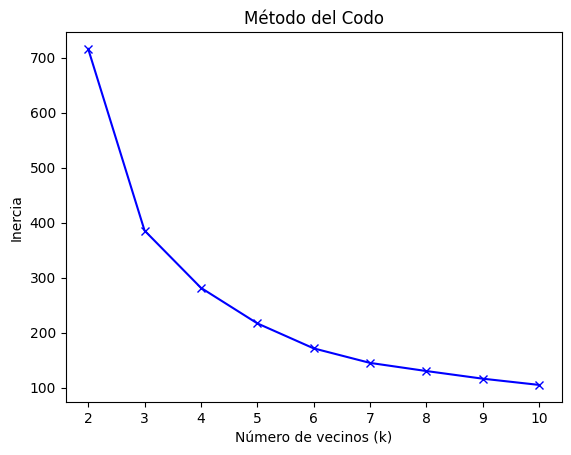

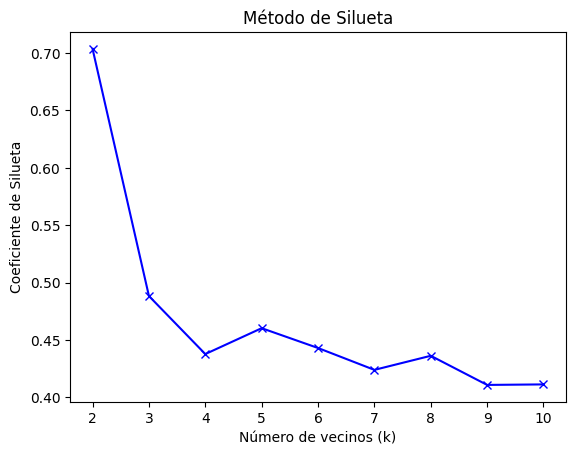

In [28]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Lista para almacenar los valores de inercia y coeficiente de silueta
inertia_values = []
silhouette_scores = []

# Valores de k a probar
k_values = range(2, 11)

# Aplicar k-means y calcular la inercia y coeficiente de silueta para cada valor de k
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Graficar los resultados
plt.plot(k_values, inertia_values, 'bx-')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Coeficiente de Silueta')
plt.title('Método de Silueta')
plt.show()


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Definir los parámetros a probar
param_grid = {
    'n_neighbors': range(2, 11),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Realizar la búsqueda exhaustiva de hiperparámetros
grid_search.fit(X_scaled, y)

# Obtener los resultados
best_score = grid_search.best_score_
best_params = grid_search.best_params_

print("Mejor puntuación de validación cruzada:", best_score)
print("Mejores hiperparámetros encontrados:", best_params)


c:\Users\Martin\Desktop\Proyecto-1\Proyecto-1\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Mejor puntuación de validación cruzada: 0.0011680125102137202
Mejores hiperparámetros encontrados: {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}


In [24]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros a probar
param_grid = {
    'n_neighbors': range(2, 11),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(
    estimator=NearestNeighbors(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Realizar la búsqueda exhaustiva de hiperparámetros
grid_search.fit(X_scaled)

# Obtener los resultados
best_score = grid_search.best_score_
best_params = grid_search.best_params_

print("Mejor puntuación de validación cruzada:", best_score)
print("Mejores hiperparámetros encontrados:", best_params)


ValueError: Invalid parameter 'weights' for estimator NearestNeighbors(metric='euclidean', n_neighbors=2). Valid parameters are: ['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'radius'].

In [30]:
import ast
import pandas as pd
from typing import Union
from fastapi import FastAPI
from datetime import datetime
import json
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("dataset_Transformado.csv", sep=";")

# Paso 3: Convertir las columnas con listas de cadenas en listas de Python
df['production_countries'] = df['production_countries'].apply(
    ast.literal_eval)
df['company_names'] = df['company_names'].apply(ast.literal_eval)
df['company_ids'] = df['company_ids'].apply(ast.literal_eval)
df['genre_names'] = df['genre_names'].apply(ast.literal_eval)

# Paso 4: Seleccionar las características relevantes para el modelo de recomendación y realizar la imputación de valores faltantes
features = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average']
X = df[features]

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Paso 5: Construir el modelo de k-NN
model = NearestNeighbors(metric='manhattan', n_neighbors=2)
model.fit(X_scaled)


def recomendacion(titulo: str):
    '''Ingresas un nombre de pelicula y te recomienda las similares en una lista'''
    # Buscar el índice de la película según el título
    movie_index = df[df['title'] == titulo].index[0]

    # Convertir el vector de características en un arreglo bidimensional
    X_movie = X_scaled[movie_index].reshape(1, -1)

    # Obtener las películas recomendadas utilizando el modelo de k-NN
    distances, indices = model.kneighbors(X_movie)
    recommended_movies = df.iloc[indices[0]]['title'].tolist()

    respuesta = {'1': str(recommended_movies[0]), '2': str(recommended_movies[1]), '3': str(
        recommended_movies[2]), '4': str(recommended_movies[3]), '5': str(recommended_movies[4])}

    return {'lista recomendada': respuesta}


In [34]:
import ast
import pandas as pd
from typing import Union
from fastapi import FastAPI
from datetime import datetime
import json
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("dataset_Transformado.csv", sep=";")

# Paso 3: Convertir las columnas con listas de cadenas en listas de Python
df['production_countries'] = df['production_countries'].apply(
    ast.literal_eval)
df['company_names'] = df['company_names'].apply(ast.literal_eval)
df['company_ids'] = df['company_ids'].apply(ast.literal_eval)
df['genre_names'] = df['genre_names'].apply(ast.literal_eval)

# Paso 4: Seleccionar las características relevantes para el modelo de recomendación y realizar la imputación de valores faltantes
features = ['budget', 'popularity', 'revenue',
            'runtime', 'vote_average', 'genre_names']
X = df[features]

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Paso 5: Construir el modelo de k-NN
model = NearestNeighbors(metric='manhattan', n_neighbors=2)
model.fit(X_scaled)


def recomendacion(titulo: str):
    '''Ingresas un nombre de pelicula y te recomienda las similares en una lista'''
    # Buscar el índice de la película según el título
    movie_index = df[df['title'] == titulo].index[0]

    # Convertir el vector de características en un arreglo bidimensional
    X_movie = X_scaled[movie_index].reshape(1, -1)

    # Obtener las películas recomendadas utilizando el modelo de k-NN
    distances, indices = model.kneighbors(X_movie)
    recommended_movies = df.iloc[indices[0]]['title'].tolist()

    respuesta = {'1': str(recommended_movies[0]), '2': str(recommended_movies[1]), '3': str(
        recommended_movies[2]), '4': str(recommended_movies[3]), '5': str(recommended_movies[4])}

    return {'lista recomendada': respuesta}


ValueError: setting an array element with a sequence.

In [35]:
import ast
import pandas as pd
from typing import Union
from fastapi import FastAPI
from datetime import datetime
import json
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("dataset_Transformado.csv", sep=";")

# Paso 3: Convertir las columnas con listas de cadenas en listas de Python
df['production_countries'] = df['production_countries'].apply(
    ast.literal_eval)
df['company_names'] = df['company_names'].apply(ast.literal_eval)
df['company_ids'] = df['company_ids'].apply(ast.literal_eval)
df['genre_names'] = df['genre_names'].apply(ast.literal_eval)

# Paso 4: Seleccionar las características relevantes para el modelo de recomendación y realizar la imputación de valores faltantes
features = ['budget', 'popularity', 'revenue',
            'runtime', 'vote_average', 'genre_names']
X = df[features]

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Paso 5: Construir el modelo de k-NN
model = NearestNeighbors(metric='manhattan', n_neighbors=2)
model.fit(X_scaled)


def recomendacion(titulo: str):
    '''Ingresas un nombre de pelicula y te recomienda las similares en una lista'''
    # Buscar el índice de la película según el título
    movie_index = df[df['title'] == titulo].index[0]

    # Convertir el vector de características en un arreglo bidimensional
    X_movie = X_scaled[movie_index].reshape(1, -1)

    # Obtener las películas recomendadas utilizando el modelo de k-NN
    distances, indices = model.kneighbors(X_movie)
    recommended_movies = df.iloc[indices[0]]['title'].tolist()

    respuesta = {'1': str(recommended_movies[0]), '2': str(recommended_movies[1]), '3': str(
        recommended_movies[2]), '4': str(recommended_movies[3]), '5': str(recommended_movies[4])}

    return {'lista recomendada': respuesta}


ValueError: setting an array element with a sequence.

In [33]:
recomendacion(titulo="Toy Story")


IndexError: list index out of range

In [37]:
df["genre_names"].head(20)

0            [Animation, Comedy, Family]
1           [Adventure, Fantasy, Family]
2                      [Romance, Comedy]
3               [Comedy, Drama, Romance]
4                               [Comedy]
5       [Action, Crime, Drama, Thriller]
6                      [Comedy, Romance]
7     [Action, Adventure, Drama, Family]
8          [Action, Adventure, Thriller]
9          [Adventure, Action, Thriller]
10              [Comedy, Drama, Romance]
11                      [Comedy, Horror]
12        [Family, Animation, Adventure]
13                      [History, Drama]
14                   [Action, Adventure]
15                        [Drama, Crime]
16                      [Drama, Romance]
17                       [Crime, Comedy]
18            [Crime, Comedy, Adventure]
19               [Action, Comedy, Crime]
Name: genre_names, dtype: object

In [38]:
import ast
import pandas as pd
from typing import Union
from fastapi import FastAPI
from datetime import datetime
import json
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer

df = pd.read_csv("dataset_Transformado.csv", sep=";")

# Paso 3: Convertir las columnas con listas de cadenas en listas de Python
df['production_countries'] = df['production_countries'].apply(
    ast.literal_eval)
df['company_names'] = df['company_names'].apply(ast.literal_eval)
df['company_ids'] = df['company_ids'].apply(ast.literal_eval)
df['genre_names'] = df['genre_names'].apply(ast.literal_eval)

# Paso 4: One-Hot Encoding de la columna 'genre_names'
mlb = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(mlb.fit_transform(
    df['genre_names']), columns=mlb.classes_)

# Combinar las columnas codificadas con el resto de características
features = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average']
X = pd.concat([df[features], genre_encoded], axis=1)

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Paso 5: Construir el modelo de k-NN
model = NearestNeighbors(metric='manhattan', n_neighbors=2)
model.fit(X_scaled)


def recomendacion(titulo: str):
    '''Ingresas un nombre de pelicula y te recomienda las similares en una lista'''
    # Buscar el índice de la película según el título
    movie_index = df[df['title'] == titulo].index[0]

    # Convertir el vector de características en un arreglo bidimensional
    X_movie = X_scaled[movie_index].reshape(1, -1)

    # Obtener las películas recomendadas utilizando el modelo de k-NN
    distances, indices = model.kneighbors(X_movie)
    recommended_movies = df.iloc[indices[0]]['title'].tolist()

    respuesta = {'1': str(recommended_movies[0]), '2': str(recommended_movies[1]), '3': str(
        recommended_movies[2]), '4': str(recommended_movies[3]), '5': str(recommended_movies[4])}

    return {'lista recomendada': respuesta}


In [39]:
recomendacion(titulo="Toy Story")


IndexError: list index out of range

In [40]:
import ast
import pandas as pd
from typing import Union
from fastapi import FastAPI
from datetime import datetime
import json
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import joblib

from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv("dataset_Transformado.csv", sep=";")

# Paso 3: Convertir las columnas con listas de cadenas en listas de Python
df['production_countries'] = df['production_countries'].apply(
    ast.literal_eval)
df['company_names'] = df['company_names'].apply(ast.literal_eval)
df['company_ids'] = df['company_ids'].apply(ast.literal_eval)
df[''] = df[''].apply(ast.literal_eval)

# Paso 4: Seleccionar las características relevantes para el modelo de recomendación y realizar la imputación de valores faltantes
features = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average']
X = df[features]

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Paso 5: Construir el modelo de k-NN
model = NearestNeighbors(metric='manhattan', n_neighbors=2)
model.fit(X_scaled)


def recomendacion(titulo: str):
    '''Ingresas un nombre de pelicula y te recomienda las similares en una lista'''
    if titulo not in df['title'].unique():
        return {'error': 'El título ingresado no se encuentra en el dataset'}

    # Buscar el índice de la película según el título
    movie_index = df[df['title'] == titulo].index[0]

    # Convertir el vector de características en un arreglo bidimensional
    X_movie = X_scaled[movie_index].reshape(1, -1)

    # Obtener las películas recomendadas utilizando el modelo de k-NN
    distances, indices = model.kneighbors(X_movie)
    recommended_movies = df.iloc[indices[0]]['title'].tolist()

    respuesta = {'1': str(recommended_movies[0]), '2': str(recommended_movies[1]), '3': str(
        recommended_movies[2]), '4': str(recommended_movies[3]), '5': str(recommended_movies[4])}

    return {'lista recomendada': respuesta}


In [41]:
recomendacion(titulo="Toy Story")


IndexError: list index out of range

In [42]:
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler


# Paso 3: Convertir las columnas con listas de cadenas en listas de Python
df['production_countries'] = df['production_countries'].apply(
    ast.literal_eval)
df['company_names'] = df['company_names'].apply(ast.literal_eval)
df['company_ids'] = df['company_ids'].apply(ast.literal_eval)
df['genre_names'] = df['genre_names'].apply(ast.literal_eval)

# Paso 4: Seleccionar las características relevantes para el modelo de recomendación y realizar la imputación de valores faltantes
features = ['budget', 'popularity', 'revenue',
            'runtime', 'vote_average', 'company_ids']
X = df[features]

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Paso 5: Construir el modelo de k-NN
model = NearestNeighbors()
model.fit(X_scaled)


@app.get('/recomendacion/{titulo}')
def recomendacion(titulo: str):
    '''Ingresas un nombre de pelicula y te recomienda las similares en una lista'''
    # Buscar el índice de la película según el título
    movie_index = df[df['title'] == titulo].index[0]

    # Convertir el vector de características en un arreglo bidimensional
    X_movie = X_scaled[movie_index].reshape(1, -1)

    # Obtener las películas recomendadas utilizando el modelo de k-NN
    distances, indices = model.kneighbors(X_movie)
    recommended_movies = df.iloc[indices[0]]['title'].tolist()

    respuesta = {'1': str(recommended_movies[0]), '2': str(recommended_movies[1]), '3': str(
        recommended_movies[2]), '4': str(recommended_movies[3]), '5': str(recommended_movies[4])}

    return {'lista recomendada': respuesta}


ValueError: malformed node or string: ['United States of America']

In [44]:

from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler


# Paso 3: Convertir las columnas con listas de cadenas en listas de Python
df['production_countries'] = df['production_countries'].apply(
    ast.literal_eval)
df['company_names'] = df['company_names'].apply(ast.literal_eval)
df['company_ids'] = df['company_ids'].apply(ast.literal_eval)
df['genre_names'] = df['genre_names'].apply(ast.literal_eval)

# Paso 4: Seleccionar las características relevantes para el modelo de recomendación y realizar la imputación de valores faltantes
features = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', "release_year"]
X = df[features]

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Paso 5: Construir el modelo de k-NN
model = NearestNeighbors()
model.fit(X_scaled)


def recomendacion(titulo: str):
    '''Ingresas un nombre de pelicula y te recomienda las similares en una lista'''
    # Buscar el índice de la película según el título
    movie_index = df[df['title'] == titulo].index[0]

    # Convertir el vector de características en un arreglo bidimensional
    X_movie = X_scaled[movie_index].reshape(1, -1)

    # Obtener las películas recomendadas utilizando el modelo de k-NN
    distances, indices = model.kneighbors(X_movie)
    recommended_movies = df.iloc[indices[0]]['title'].tolist()

    respuesta = {'1': str(recommended_movies[0]), '2': str(recommended_movies[1]), '3': str(
        recommended_movies[2]), '4': str(recommended_movies[3]), '5': str(recommended_movies[4])}

    return {'lista recomendada': respuesta}


ValueError: malformed node or string: ['United States of America']